In [6]:
import matplotlib.pyplot as plt
import os
import numpy as np
import rasterio
from rasterio.plot import show
import numpy as np
import xarray as xr
import matplotlib.colors
from matplotlib import cm
import h5py
import rioxarray as rxr
from rasterio.crs import CRS
from constants import *
import gc


In [7]:
targets = ['Upper San Joaquin','Upper Tuolumne','Upper King','Upper Merced','Upper Kaweah','Upper Kern','Upper Tule']
sj = sn_watersheds[sn_watersheds.name == targets[0]]

In [14]:
# print( #typo here to prevent accidentally running the entire cell and destroying the kernel
fp = 'c:/users/marianne/documents/data/reanalysis/h5/'
scripts_dir = 'c:/users/marianne/documents/pe_snow_fires/scripts/'
end_day = 365

# tuol_outline = gpd.read_file(scripts_dir + 'aso_ce_bounds.shp')
tuol_outline = sj
tuol_outline_rp = tuol_outline.to_crs(CRS.from_epsg(4326))
####

daily_swe_mean = {} #key = year, value = array of daily avg swe values
daily_swe_total = {} #key = year, value = array of daily total swe values
for yr in range(1990, 2016): #range(1985 , 2016):
    dailyswe = [] # mean swe of each day
    dailyswe_total = [] 
    numpixels = [] # num swe measurements each da
    hf = h5py.File(fp + 'SN_SWE_WY'+ str(yr) + '.h5', 'r')  
    #converting a year's h5 file to .tif
    year_list = []
    lat = hf.get('lat')
    lon = hf.get('lon')
    swe = hf.get("SWE")
    rows = lon[:].flatten()
    cols = lat[:].flatten()
    for day in range(end_day):
        gc.collect()
        data = swe[day,:,:]
        data = np.float32(data)
        data[data<0] = np.nan
        single_day = xr.DataArray(data.transpose(), dims=('y', 'x'), 
              coords={'band': day, 'x': rows, 'y': cols})
        del data
        single_day = single_day.assign_coords(coords={'day':day})
        single_day = single_day.rio.write_crs(CRS.from_epsg(4326))
        clipped = single_day.rio.clip(tuol_outline_rp.geometry, CRS.from_epsg(4326), all_touched=True)
        del single_day
        swe_tmp = clipped.values
        swe_tmp=swe_tmp[swe_tmp>0]
        dailyswe.append(np.nanmean(swe_tmp))
        dailyswe_total.append(np.nansum(swe_tmp))
        numpixels.append(len(swe_tmp))
        del clipped
        del swe_tmp
        gc.collect()

    dailyswe=np.array(dailyswe)
    dailyswe_total = np.array(dailyswe_total)
    numpixels = np.array(numpixels)
    daily_swe_mean[yr] = dailyswe 
    daily_swe_total[yr] = dailyswe_total
    del hf
    del dailyswe
    del numpixels
    del lat
    del lon
    del rows
    del cols
    del swe
    

np.save('sw_daily_swe_total.npy',daily_swe_total)
np.save('sw_daily_swe_mean.npy',daily_swe_mean)
# np.save('ce_daily_swe_total.npy',daily_swe_sum)
# np.save('ce_daily_swe_mean.npy',daily_swe_mean)

'c:\\Users\\Marianne\\Documents\\pe_snow_fires\\scripts'

In [3]:
# print( #typo here to prevent accidentally running the entire cell and destroying the kernel
fp = 'c:/users/marianne/documents/data/reanalysis/h5/'
scripts_dir = 'c:/users/marianne/documents/pe_snow_fires/scripts/'
end_day = 365

# tuol_outline = gpd.read_file(scripts_dir + 'aso_ce_bounds.shp')
# tuol_outline_rp = tuol_outline.to_crs(CRS.from_epsg(4326))

basin_outline = sn_watersheds[sn_watersheds['name']=='Upper San Joaquin']
basin_outline_rp = basin_outline.to_crs(CRS.from_epsg(4326))
####

daily_swe_mean = {} #key = year, value = array of daily avg swe values
daily_swe_total = {} #key = year, value = array of daily total swe values
for yr in range(1985, 2016): #range(1985 , 2016):
    dailyswe = [] # mean swe of each day
    dailyswe_total = [] 
    numpixels = [] # num swe measurements each da
    hf = h5py.File(fp + 'SN_SWE_WY'+ str(yr) + '.h5', 'r')  
    #converting a year's h5 file to .tif
    year_list = []
    lat = hf.get('lat')
    lon = hf.get('lon')
    swe = hf.get("SWE")
    rows = lon[:].flatten()
    cols = lat[:].flatten()
    for day in range(end_day):
        data = swe[day,:,:]
        data = np.float32(data)
        data[data<0] = np.nan
        single_day = xr.DataArray(data.transpose(), dims=('y', 'x'), 
              coords={'band': day, 'x': rows, 'y': cols})
        single_day = single_day.assign_coords(coords={'day':day})
        single_day = single_day.rio.write_crs(CRS.from_epsg(4326))
        clipped = single_day.rio.clip(basin_outline_rp.geometry, CRS.from_epsg(4326), all_touched=True)
        swe_tmp = clipped.values
        swe_tmp=swe_tmp[swe_tmp>0]
        dailyswe.append(np.nanmean(swe_tmp))
        dailyswe_total.append(np.nansum(swe_tmp))
        numpixels.append(len(swe_tmp))
        del single_day
        del data
        del clipped
        del swe_tmp

    dailyswe=np.array(dailyswe)
    dailyswe_total = np.array(dailyswe_total)
    numpixels = np.array(numpixels)
    daily_swe_mean[yr] = dailyswe 
    daily_swe_total[yr] = dailyswe_total
    del hf
    del dailyswe
    del numpixels
    del lat
    del lon
    del rows
    del cols
    del swe
    gc.collect()

np.save('sj_daily_swe_total_all.npy',daily_swe_total)
np.save('sj_daily_swe_mean_all.npy',daily_swe_mean)

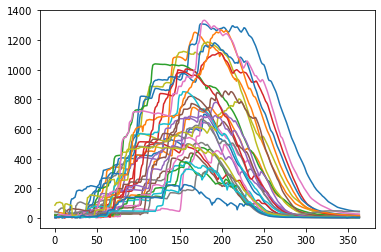

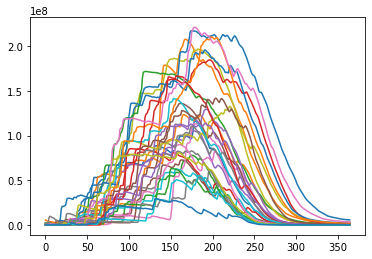

In [15]:
f,ax=plt.subplots()
for i in daily_swe_mean.keys():
    ax.plot(daily_swe_mean[i])

f,ax=plt.subplots()
for i in daily_swe_total.keys():
    ax.plot(daily_swe_total[i])

'c:\\Users\\Marianne\\Documents\\pe_snow_fires\\scripts'

In [ ]:
import h5py
import rasterio as rio
import xarray as xr

#change this to the folder where all your data are
fp = 'c:/users/marianne/documents/data/'
#max_day is an array with the day of water year that had the highest average swe for that year
max_day = np.load(fp+'max_day.npy') 
daily_sum = np.load(fp + 'daily_swe_sum.npy')
daily_mean = np.load(fp + 'daily_swe_mean.npy')

daily_swe_mean = []
#max_swe_map = {}
i=0
for yr in range(1985,2016):
    hf = h5py.File(fp + 'reanalysis/h5/SN_SWE_WY'+ str(yr) + '.h5', 'r')
    swe = hf.get('SWE')
    idx = max_day[i]
    i=i+1
    tmp = swe[idx,:,:]
    #max_swe_map[yr] = tmp
    data = swe[idx,:,:]
    #lat = hf.get('lat')
    #lon = hf.get('lon')
    data = np.float32(data)
    data[data<0] = np.nan
    #rows = lon[:].flatten()
    #cols = lat[:].flatten()
    daily_swe_mean.append(np.nanmean(data))
    #im_save = xr.DataArray(data.transpose(), dims=('y', 'x'), 
    #        coords={'x': rows, 'y': cols})
    #im_save.rio.to_raster(fp + 'max_swe'+str(yr)+'.tif')
#np.save('data/max_swe_map.npy',max_swe_map)

np.save(daily_swe_mean, )

In [14]:
from constants import *
filepath = 'c:/users/marianne/documents/data/'
file = filepath + 'max_swe2000.tif'
sj = sn_watersheds[sn_watersheds['name']=='Upper San Joaquin']

In [9]:
import rioxarray 
data = rioxarray.open_rasterio(file)
data = data.rio.write_crs('epsg:4326')

max_day:  [179 167 174 111 169 164 177 143 153 149 175 165 119 196 192 162 156 175
 220 153 180 198 151 147 156 163 178 196 119 183 132]


<AxesSubplot:>

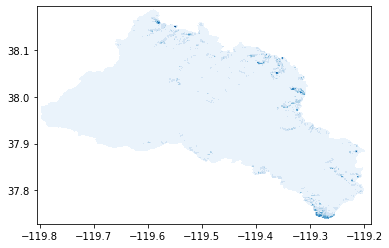

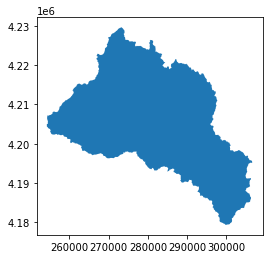

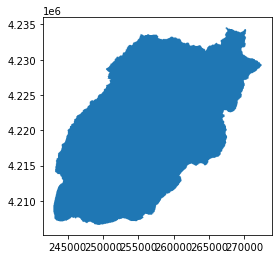

In [4]:
max_day = np.load(pe_data_dir + 'max_day.npy') 
print("max_day: ", max_day)
fp = 'c:/users/marianne/documents/data/ASO/'

daily_sum = np.load(pe_data_dir + 'daily_swe_sum.npy',  allow_pickle=True)
daily_mean = np.load(pe_data_dir + 'daily_swe_mean.npy',  allow_pickle=True)

tuolumne = rxr.open_rasterio(fp + 'ASO_50M_SWE_USCATB_20130608.tif')

tuolumne = tuolumne.rio.reproject(CRS.from_epsg(4326))
f,ax=plt.subplots()
x =  tuolumne.x
y= tuolumne.y
x_, y_ = np.meshgrid(x, y)
z_grid = np.array(tuolumne.values[0,:,:])
z_grid[z_grid<0] = np.nan
z_grid[z_grid>40000] = np.nan
# .reshape(len(lat),len(lon))
ax.contourf(x_,y_,z_grid,cmap='Blues')

import rasterio
from rasterio.features import shapes

tuol_data = fp + 'ASO_50M_SWE_USCATB_20130608.tif'
with rasterio.Env():
    with rasterio.open(tuol_data) as src:
        image = src.read(1) # first band
        results = (
        {'properties': {'raster_val': v}, 'geometry': s}
        for i, (s, v) 
            in enumerate(
                shapes(image, transform=src.transform)))
geoms = list(results)
import geopandas as gp
tuol_polygons  = gp.GeoDataFrame.from_features(geoms)

ce_data = fp + 'ASO_50M_SWE_USCACE_20160426.tif'

with rasterio.Env():
    with rasterio.open(ce_data) as src:
        image = src.read(1) # first band
        results = (
        {'properties': {'raster_val': v}, 'geometry': s}
        for i, (s, v) 
            in enumerate(
                shapes(image, transform=src.transform)))
geoms = list(results)
import geopandas as gp
ce_polygons  = gp.GeoDataFrame.from_features(geoms)





from shapely.ops import unary_union
tuol_outline = unary_union(tuol_polygons[tuol_polygons.raster_val>src.nodata].geometry)
ce_outline = unary_union(ce_polygons[ce_polygons.raster_val>src.nodata].geometry)

d = {'name': ['aso_in_tuol'], 'geometry': [tuol_outline]}
gdf = gpd.GeoDataFrame(d)
gdf.plot()
gdf.to_file('aso_tuolumne_bounds.shp',crs=CRS.from_epsg(32611))

d2 = {'name': ['aso_in_ce'], 'geometry': [ce_outline]}
gdf2 = gpd.GeoDataFrame(d2)
gdf2.plot()

In [5]:
gdf2.to_file('aso_ce_bounds.shp',crs= CRS.from_epsg(32611))

In [6]:
gdf3 = gdf.append(gdf2)
gdf3.to_file('aso_tuolumnece_bounds.shp',crs=CRS.from_epsg(32611))


<AxesSubplot:>

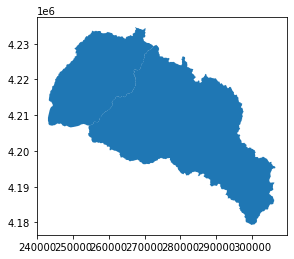

In [13]:
test = gpd.read_file('aso_tuolumne_bounds.shp')

<AxesSubplot:>

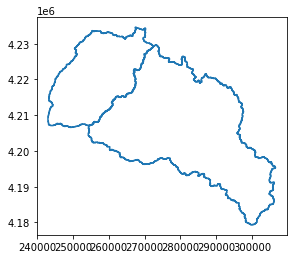

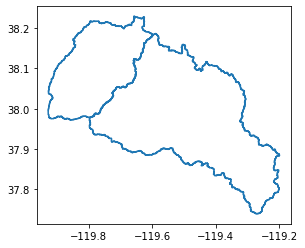

In [20]:
test = gpd.read_file('aso_tuolumne_bounds.shp')
test.boundary.plot()
test.to_crs(CRS.from_epsg(4326)).boundary.plot()

In [2]:
# print( #typo here to prevent accidentally running the entire cell and destroying the kernel
fp = 'c:/users/marianne/documents/data/reanalysis/h5/'
scripts_dir = 'c:/users/marianne/documents/pe_snow_fires/scripts/'
end_day = 365

tuol_outline = gpd.read_file(scripts_dir + 'aso_tuolumne_bounds.shp')
tuol_outline_rp = tuol_outline.to_crs(CRS.from_epsg(4326))
####

daily_swe_mean = {} #key = year, value = array of daily avg swe values
daily_swe_total = {} #key = year, value = array of daily total swe values
for yr in range(1985, 2016): #range(1985 , 2016):
    dailyswe = [] # mean swe of each day
    dailyswe_total = [] 
    numpixels = [] # num swe measurements each da
    hf = h5py.File(fp + 'SN_SWE_WY'+ str(yr) + '.h5', 'r')
    
    #converting a year's h5 file to .tif
    year_list = []
    lat = hf.get('lat')
    lon = hf.get('lon')
    swe = hf.get("SWE")
    for day in range(end_day):
        data = swe[day,:,:]
        data = np.float32(data)
        data[data<0] = np.nan
        rows = lon[:].flatten()
        cols = lat[:].flatten()
        single_day = xr.DataArray(data.transpose(), dims=('y', 'x'), 
              coords={'band': day, 'x': rows, 'y': cols})
        single_day = single_day.assign_coords(coords={'day':day})
        single_day = single_day.rio.write_crs(CRS.from_epsg(4326))
        clipped = single_day.rio.clip(tuol_outline_rp.geometry, CRS.from_epsg(4326), all_touched=True)
        swe_tmp = clipped.values
        swe_tmp=swe_tmp[swe_tmp>0]
        dailyswe.append(np.nanmean(swe_tmp))
        dailyswe_total.append(np.nansum(swe_tmp))
        numpixels.append(len(swe_tmp))

    dailyswe=np.array(dailyswe)
    dailyswe_total = np.array(dailyswe_total)
    numpixels = np.array(numpixels)
    daily_swe_mean[yr] = dailyswe 
    daily_swe_total[yr] = dailyswe_total
 

C:\Users\Marianne\AppData\Local\Temp/ipykernel_10140/2692493378.py:39: RuntimeWarning: Mean of empty slice
  dailyswe.append(np.nanmean(swe_tmp))


MemoryError: Unable to allocate 35.9 MiB for an array with shape (6601, 5701) and data type bool

In [136]:
plt.plot(daily_swe_mean[1985])
plt.show()

KeyError: 1985

In [3]:
yr

1986

In [4]:
day

262